# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Constructing DateFrames

In [11]:
Stream = pd.read_sql('SELECT * FROM Stream', con = sqlite3.connect('twitch.sqlite'), index_col = None)

In [12]:
Chat = pd.read_sql('SELECT * FROM Chat', con = sqlite3.connect('twitch.sqlite'), index_col = None)

In [13]:
Stream.head()

,time,device_id,login,channel,country,player,game,stream_format,subscriber
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,None,NaN
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,0.0
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,0.0
3,2015-01-01 11:15:30,0cda8226ba2583424c80c3c1c22c1256b080ad17,02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b,estelle,CH,site,Dota 2,high,0.0
4,2015-01-01 11:28:19,e3288ca5e3153aa85e32f64cdd994b7666968dcf,b920c228acbcbebee26d9c79f6eb73b73a9480c7,morty,FR,site,Heroes of the Storm,medium,0.0


In [14]:
Chat.head()

,time,device_id,login,channel,country,player,game
0,2015-01-01 18:45:50,70e2b95b5ac0d4c227e46966658d16b3e044996e,5c2f5c1f19a7738e16ed0be551d865e8a8fce71d,jerry,BY,None,Dota 2
1,2015-01-01 01:16:57,f2b9065b55fd80d6aa653ce989b489f4ec5198be,0d77740e4fb5ce77d94f9f6c8ef1f762990d0344,elaine,HK,None,Devil May Cry 4: Special Edition
2,2015-01-01 16:22:10,d448ba963d7e1023dd1b0a40b95d4f6611750692,77ab14c1fb815e1c369ba0cf7d4c56b4fe489997,frank,GB,iphone_t,League of Legends
3,2015-01-01 03:58:13,8d6823dc52b400b50aebf269bf1f03a36d19eeaa,91cb88c0743761589273fc5e800e7743ece46494,frank,US,iphone_t,League of Legends
4,2015-01-01 11:47:35,16c1e39594d62358d27ae604ad43a071f0d86bc4,51a9234f83d656607cfd7f26690c12d2ffbce353,estelle,DE,None,Dota 2


# Exploratory Data Analysis

## Games Vs. No. Streamers

In [48]:
Games_Devices = pd.DataFrame(Stream.groupby('game')['device_id'].count().reset_index())

In [49]:
Games_Devices.rename(columns = {"game": "Game", "device_id": "No. Streamers"}, inplace = True)

In [53]:
Games_Devices = Games_Devices.sort_values(by = 'No. Streamers', ascending = False)

In [54]:
Games_Devices = Games_Devices.head(10)

In [55]:
Games_Devices

,Game,No. Streamers
23,League of Legends,193524
14,Dota 2,85603
10,Counter-Strike: Global Offensive,54437
11,DayZ,37997
22,Heroes of the Storm,35309
34,The Binding of Isaac: Rebirth,29465
17,Gaming Talk Shows,28115
39,World of Tanks,15932
20,Hearthstone: Heroes of Warcraft,14399
1,Agar.io,11478


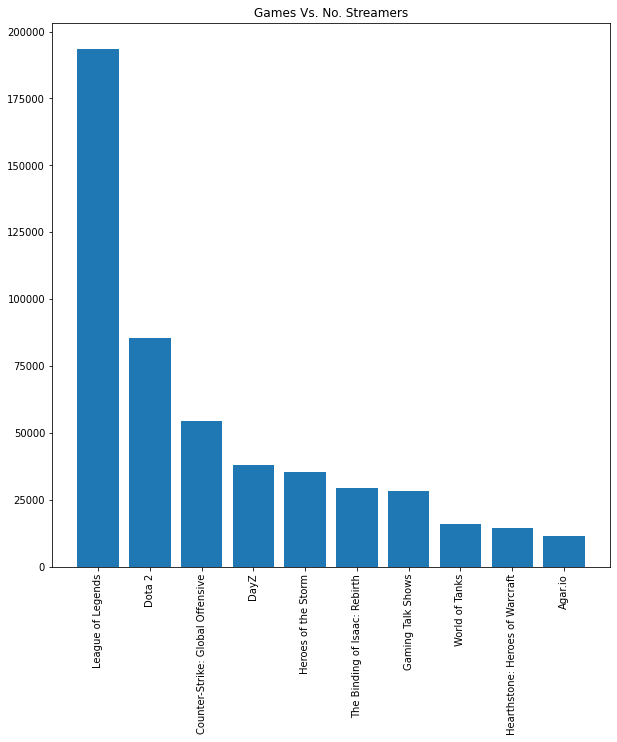

In [188]:
%matplotlib inline

plt.figure(figsize = (10, 10))

ax = plt.subplot()

plt.title("Games Vs. No. Streamers")

plt.bar(Games_Devices['Game'], Games_Devices['No. Streamers'])

ax.set_xticklabels(Games_Devices['Game'], rotation = 90)

## League of Legends By Users' Countries

In [85]:
Country_Users = pd.DataFrame(Stream[ Stream['game'] == 'League of Legends' ].groupby('country')['device_id'].count().reset_index()).sort_values(by = 'device_id', ascending = False)

In [86]:
Country_Users.rename(columns = {"country": "Country", "device_id": "No. Users"}, inplace = True)

In [88]:
Country_Users = Country_Users.head(10)

In [89]:
Country_Users

,Country,No. Users
147,US,85602
27,CA,13033
36,DE,10835
51,GB,6961
143,TR,4412
9,AU,3911
132,SE,3533
110,NL,3213
37,DK,2909
58,GR,2885


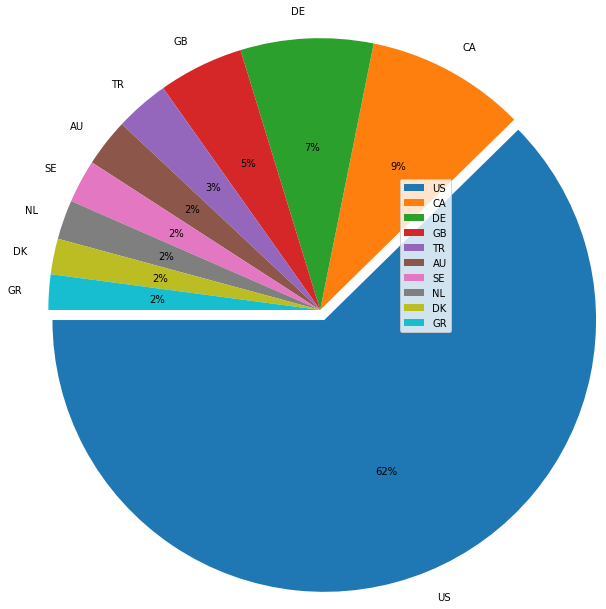

In [195]:
%matplotlib inline

plt.figure(figsize = (5, 5))

explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.pie(Country_Users['No. Users'], labels = Country_Users['Country'], radius = 2.5, autopct = '%d%%', explode = explode, \
       startangle = 180)

plt.legend(Country_Users['Country'], loc = 'best')

plt.savefig('pie.png')

# Traffic Per Hours of The Day

In [167]:
Time_Streams = pd.DataFrame(Stream.groupby(Stream.time.apply(lambda x : x.split(' ')[1].split(':')[0]))\
                            ['device_id'].count().reset_index())

In [168]:
Time_Streams.rename(columns = {"time": "Time", "device_id": "No. Streamers"}, inplace = True)

In [169]:
Time_Streams

,Time,No. Streamers
0,00,15411
1,01,14407
2,02,24137
3,03,16205
4,04,15098
5,05,6265
6,06,1483
7,07,8505
8,08,11222
9,09,9863


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

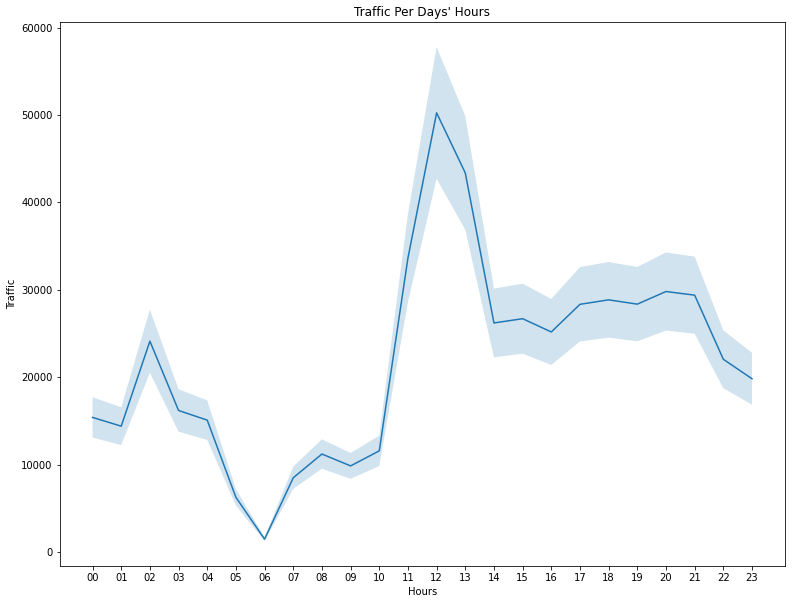

In [196]:
%matplotlib ipympl

plt.figure(figsize = (13, 10))

plt.title("Traffic Per Days' Hours")

plt.xlabel("Hours")
plt.ylabel("Traffic")

y = [int(x) for x in Time_Streams['No. Streamers']]

y_upper = [i + (i * 0.15) for i in y]
y_lower = [i - (i * 0.15) for i in y]

plt.fill_between(Time_Streams['Time'], y_lower, y_upper, alpha = 0.2)

plt.plot(Time_Streams['Time'], Time_Streams['No. Streamers'])

plt.savefig('line.png')